# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby("type").sum()["driver_count"]
total_drivers.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_ride = total_fares / total_rides
avg_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver = total_fares / total_drivers
avg_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides":total_rides, 
                                 "Total Drivers":total_drivers,
                                 "Total Fares":total_fares,
                                 "Average Fare per Rider":avg_fare_ride,
                                 "Average Fare per Driver":avg_fare_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Rider,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Rider,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
#from stack overflow: 
# https://stackoverflow.com/questions/20937538/how-to-display-pandas-dataframe-of-floats-using-a-format-string-for-columns
pd.options.display.float_format = '${:,.2f}'.format
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Rider,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 9. Using groupby() on the pyber_data_df to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

sum_fare_date_df = pyber_data_df.groupby(["type", "date"]).sum()[['fare']]

sum_fare_date_df.head(20)


fare
type  date                      
Rural 2019-01-01 09:45:36 $43.69
      2019-01-02 11:18:32 $52.12
      2019-01-03 19:51:01 $19.90
      2019-01-04 03:31:26 $24.88
      2019-01-06 07:38:40 $47.33
      2019-01-08 06:19:45 $19.39
      2019-01-09 15:30:35 $31.84
      2019-01-11 04:39:27 $16.42
      2019-01-14 07:09:17 $18.05
      2019-01-14 15:58:48 $54.10
      2019-01-15 21:44:26 $30.26
      2019-01-18 00:46:28 $15.12
      2019-01-18 07:36:46 $43.57
      2019-01-19 11:40:46 $49.44
      2019-01-19 12:38:07 $38.68
      2019-01-19 20:21:54 $56.78
      2019-01-22 12:42:55 $13.50
      2019-01-22 15:36:24 $10.11
      2019-01-23 06:52:00 $40.24
      2019-01-24 13:32:12 $34.74

In [12]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sum_fare_date_df = sum_fare_date_df.reset_index()
sum_fare_date_df.head()


,type,date,fare
0,Rural,2019-01-01 09:45:36,$43.69
1,Rural,2019-01-02 11:18:32,$52.12
2,Rural,2019-01-03 19:51:01,$19.90
3,Rural,2019-01-04 03:31:26,$24.88
4,Rural,2019-01-06 07:38:40,$47.33


In [13]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

sum_fare_date_pivot = sum_fare_date_df.pivot(index='date', columns='type', values='fare')
sum_fare_date_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,$nan,$nan,$37.91
2019-01-01 00:46:46,$nan,$47.74,$nan
2019-01-01 02:07:24,$nan,$24.07,$nan
2019-01-01 03:46:50,$nan,$nan,$7.57
2019-01-01 05:23:21,$nan,$nan,$10.75
2019-01-01 09:45:36,$43.69,$nan,$nan
2019-01-01 12:32:48,$nan,$25.56,$nan
2019-01-01 14:40:14,$nan,$nan,$5.42
2019-01-01 14:42:25,$nan,$nan,$12.31


In [14]:
# 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2018-01-01':'2018-04-29'.
df = sum_fare_date_pivot.loc['2019-01-01':'2019-04-29']
df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,$nan,$nan,$37.91
2019-01-01 00:46:46,$nan,$47.74,$nan
2019-01-01 02:07:24,$nan,$24.07,$nan
2019-01-01 03:46:50,$nan,$nan,$7.57
2019-01-01 05:23:21,$nan,$nan,$10.75
...,...,...,...
2019-04-28 14:28:36,$nan,$nan,$11.46
2019-04-28 16:29:16,$nan,$nan,$36.42
2019-04-28 17:26:52,$nan,$nan,$31.43


In [15]:
# 13. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
df.index = pd.to_datetime(df.index)
df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,$nan,$nan,$37.91
2019-01-01 00:46:46,$nan,$47.74,$nan
2019-01-01 02:07:24,$nan,$24.07,$nan
2019-01-01 03:46:50,$nan,$nan,$7.57
2019-01-01 05:23:21,$nan,$nan,$10.75
...,...,...,...
2019-04-28 14:28:36,$nan,$nan,$11.46
2019-04-28 16:29:16,$nan,$nan,$36.42
2019-04-28 17:26:52,$nan,$nan,$31.43


In [16]:
# 14. Check that the datatype for the index is datetime using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [17]:
# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_fares_week = df.resample("W").sum()
sum_fares_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"
2019-02-10,$115.80,$974.34,"$2,162.64"
2019-02-17,$95.82,"$1,045.50","$2,235.07"
2019-02-24,$419.06,"$1,412.74","$2,466.29"
2019-03-03,$175.14,$858.46,"$2,218.20"


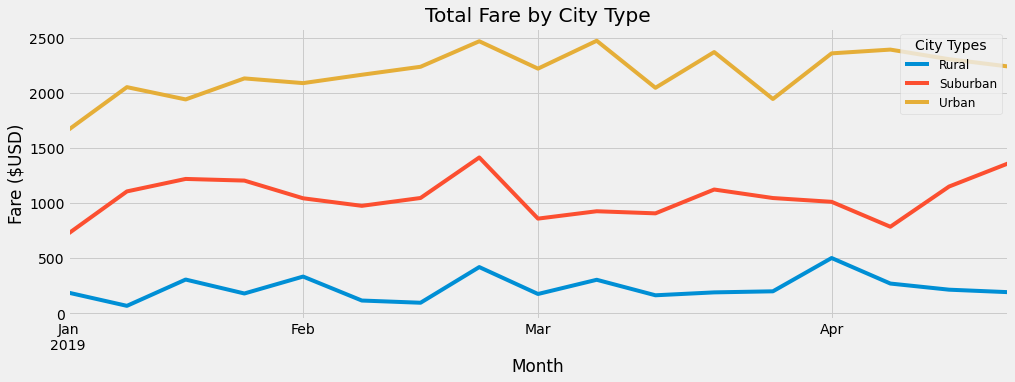

In [27]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

plt = sum_fares_week.plot(figsize=(15,5))
plt.set_xlabel('Month')
plt.set_ylabel('Fare ($USD)')
plt.set_title('Total Fare by City Type')
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="upper right", title="City Types")


# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

#Save Figure
fig = plt.get_figure()
fig.savefig("analysis/PyBer_fare_summary.png")